In [1]:
import visa
import sys
import os
import numpy as np
import pandas as pd
import time
from matplotlib import pyplot as plt

In [2]:
rm = visa.ResourceManager()
VISA_ADDRESS=rm.list_resources()[0]
print(VISA_ADDRESS)

USB0::0x0957::0x0909::MY54204090::0::INSTR


In [3]:
num_samples=100
lcr_df=pd.DataFrame(np.zeros((num_samples,3)),columns=['Ls','Q','timestamp'])
# lcr_df

In [4]:
E4980AL = rm.open_resource(VISA_ADDRESS)
E4980AL.write(':TRIGger:SOURce %s' % ('BUS'))

E4980AL.write(':FORMat:BORDer %s' % ('SWAP'))
E4980AL.write(':FORMat:DATA %s' % ('REAL'))


loopstart=time.time()
for i in range(num_samples):
    
    E4980AL.write(':TRIGger:IMMediate')
    Ls,Q,_ = E4980AL.query_binary_values(':FETCh:IMPedance:FORMatted?','d',False)
    E4980AL.write(':MEMory:CLEar %s' % ('DBUF'))
    now=time.time()-loopstart
    lcr_df.loc[i]=[Ls*1E6,Q*100,now]
    time.sleep(0.01)


E4980AL.close()
rm.close()

print(Ls,Q, sep='\t')
# end of py_test
# lcr_df.tail(10)

0.00013844474130265483	19.253553134871332


In [5]:
directory=r'C:\Users\dewittc\OneDrive - Boston Scientific\meter\lcr_meter\raw_data'
os.chdir(directory)
filename='42AWG_4_250_7_3.csv'
lcr_df.to_csv(filename)
# lcr_df.tail(10)

Text(0.5,0,'time (s)')

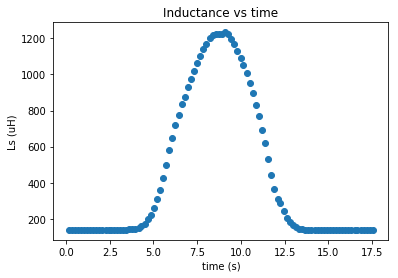

In [6]:
fig,ax=plt.subplots(nrows=1,ncols=1)
ax.scatter(lcr_df['timestamp'],lcr_df['Ls'])
ax.set_title('Inductance vs time')
ax.set_ylabel('Ls (uH)')
ax.set_xlabel('time (s)')